In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
import glob
import json
import matplotlib.pyplot as plt
import plotly.express as px
import tweets_utils
import importlib

%autosave 3600

Autosaving every 3600 seconds


In [2]:
bots = pd.read_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/bot_score.csv")
bots

,id,user
0,1252818873578975232,matomecorona
1,1239490346691760128,Host24Space
2,1203462567861084160,naija_reports
3,1238121032067801088,shopfle
4,1257388917369667584,NbknewsC
...,...,...
609,1180444353577144320,edunewsid
610,91430932,PascalRtl
611,734775583842914304,news_naira
612,3231019148,JayaKatwang15


In [3]:
credibility_url = pd.read_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/domain_credibility.csv")
credibility_url

,Domain,Class
0,100percentfedup.com,low
1,100percentfedup.com,high
2,10news.one,low
3,12minutos.com,low
4,12news.com,high
...,...,...
820,childrenshealthdefense.org,low
821,"AdvancedMedicineConference.com,",low
822,aol.com,high
823,trendingpolitics.com,low


In [4]:
retweet_name = []
retweet_id = []
retweeted_name = []
retweeted_id = []
rt_link = []
tweet_name = []
tweet_id = []
link = []

result = []

total_len = 0
original_len = 0
retweet_len = 0
reply_len = 0
d_total_len = 0
d_original_len = 0
d_retweet_len = 0
d_reply_len = 0

cols_tweets = [u'user_screen_name',u'user_id', u'created_at', 
               u'urls', u"rt_created_at", u"rt_user_id", 
               u"rt_user_screen_name", u'in_reply_to_user_id', 
               u'in_reply_to_screen_name', u'in_reply_to_status_id']

files_tweets = glob.glob("F:/COVID-19-Tweets/*/tweets.csv")

In [5]:
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_tweets, True, bots["user"]))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        #original post
        tweet_name.extend(lista[i]["original_names"])
        tweet_id.extend(lista[i]["original_ids"])
        link.extend(lista[i]["links"])
#         #user who retweet
        retweet_name.extend(lista[i]["retweet_users"])
        retweet_id.extend(lista[i]["retweet_ids"])
#         #user retweeted
        retweeted_name.extend(lista[i]["retweeted_users"])
        retweeted_id.extend(lista[i]["retweeted_ids"])
        rt_link.extend(lista[i]["rt_link"])

        #len
        total_len = total_len + lista[i]["total_len"]
        original_len = original_len + lista[i]["original_len"]
        retweet_len = retweet_len + lista[i]["retweet_len"]
        reply_len = reply_len + lista[i]["reply_len"]
        d_total_len = d_total_len + lista[i]["d_total_len"]
        d_original_len = d_original_len + lista[i]["d_original_len"]
        d_retweet_len = d_retweet_len + lista[i]["d_retweet_len"]
        d_reply_len = d_reply_len + lista[i]["d_reply_len"]

stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Reading file: F:/COVID-19-Tweets\2020-01\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Mese numero 1
Reading file: F:/COVID-19-Tweets\2020-02\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Mese numero 2
Reading file: F:/COVID-19-Tweets\2020-03\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Processing chunk 13
Processing chunk 14
Processing chunk 15
Mese numero 3
Reading file: F:/COVID-19-Tweets\2020-04\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7


In [6]:
tweets_utils.stats(total_len, original_len, retweet_len, reply_len)

Number of total tweets: 66412411
Number of original tweets: 13999715
Number of retweet: 48312504
Number of reply: 4100192
Number of original_tweets: 21.08% of total tweets
Number of retweets: 72.75% of total tweets
Number of replies: 6.17% of total tweets
Check sum == len(tweets):  True


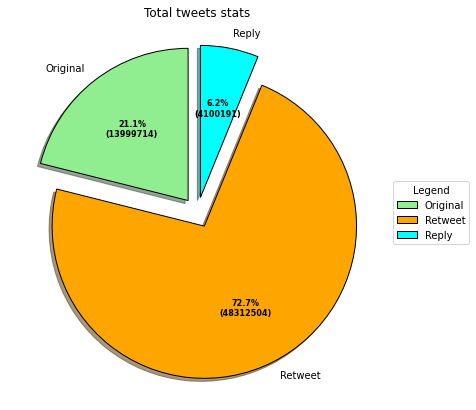

In [7]:
tweets_utils.print_pie_chart3("Total tweets stats","Original","Retweet", "Reply", original_len, retweet_len, reply_len)

In [8]:
tweets_utils.stats(d_total_len, d_original_len, d_retweet_len, d_reply_len)

Number of total tweets: 175324
Number of original tweets: 139213
Number of retweet: 36111
Number of reply: 0
Number of original_tweets: 79.4% of total tweets
Number of retweets: 20.6% of total tweets
Number of replies: 0.0% of total tweets
Check sum == len(tweets):  True


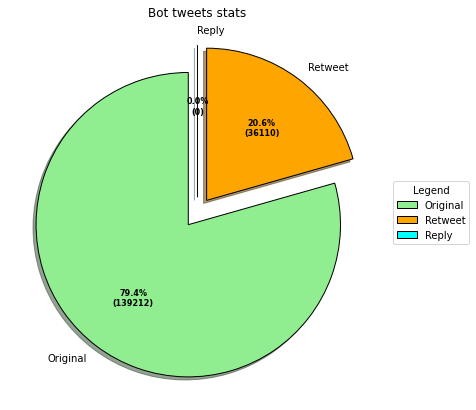

In [9]:
tweets_utils.print_pie_chart3("Bot tweets stats","Original","Retweet", "Reply", d_original_len, d_retweet_len, d_reply_len)

In [16]:
df = pd.DataFrame(list(zip(tweet_name, link)),
               columns =['Name', 'Link'])
df.to_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/bot_domain.csv")

In [18]:
df = pd.DataFrame(list(zip(retweet_name, retweeted_name, rt_link)),
               columns =['Name', 'Rt_name', 'Link'])
df.to_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/bot_rt_domain.csv")

In [34]:
def remove_www(url_list):
    urls_rt_beauty = []
    for i in url_list:
        value = i
        if "www" in i:
            splitted = i.split(".")
            if(len(splitted) > 2):
                value = splitted[1] + "." + splitted[2]
            else:
                value = splitted[1]
        urls_rt_beauty.append(value)
    return urls_rt_beauty

In [35]:
urls = [tweets_utils.url_decompress(v) if v != "[]" else "0" for v in link]
urls = list(filter(lambda num: num != "0", urls))
urls = remove_www(urls)
# urls

www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.electionnewsbay.com
['www', 'electionnewsbay', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.cdc.gov
['www', 'cdc', 'gov']
www.dailymail.co.uk
['www', 'dailymail', 'co', 'uk']
www.fxstreet.com
['www', 'fxstreet', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.vox.com
['www', 'vox', 'com']
www.fxstreet.com
['www', 'fxstreet', 'com']

['www', 'ultimatepocket', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.reuters.com
['www', 'reuters', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.infomediatico.com
['www', 'infomediatico', 'com']
www.cendananews.com
['www', 'cendananews', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.oananews.org
['www', 'oananews', 'org']
www.cnbc.com
['www', 'cnbc', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.trendard.com
['www', 'trendard', 'com']
www.presse-channel.net
['www', 'presse-channel', 'net']
www.fxstreet.com
['www', 'fxstreet', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.thenewsedge.com
['www', 'thenewsedge', 'com']
www

www.theguardian.com
['www', 'theguardian', 'com']
www.asia-first.com
['www', 'asia-first', 'com']
www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.newssummedup.com
['www', 'newssummedup', 'com']
www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.trendard.com
['www', 'trendard', 'com']
www.retargetingnews.com
['www', 'retargetingnews', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.newssummedup.com
['www', 'newssummedup', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.oananews.org
['www', 'oananews', 'org']
www.trendard.com
['www', 'trendard', 'com']
www.fxempire.com
['www', 'fxempire', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.dailymail.co.uk
['www', 'dailymail', 'co', 'uk']
www.electionnewsbay.com
['www', 'electionnewsbay', 'com']
www.washingtonpost.com
['www', 'was

['www', 'msn', 'com']
www.newssummedup.com
['www', 'newssummedup', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.mumbaipress.com
['www', 'mumbaipress', 'com']
www.rtbf.be
['www', 'rtbf', 'be']
www.zerounotv.it
['www', 'zerounotv', 'it']
www.therahnuma.com
['www', 'therahnuma', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.therahnuma.com
['www', 'therahnuma', 'com']
www.therah

['www', 'zazoom', 'info']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.zerohedge.com
['www', 'zerohedge', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.khabarsbollywood.com
['www', 'khabarsbollywood', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.smorfiadigitale.it
['www', 'smorfiadigitale', 'it']
www.dailyfx.com
['www', 'dailyfx', 'com']
www.smorfiadigitale.it
['www', 'smorfiadigitale', 'it']
www.zeit.de
['www', 'zeit', 'de']
www.zazoom.info
['www', 'zazoom', 

['www', 'agi', 'it']
www.pausefun.com
['www', 'pausefun', 'com']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.theguardian.com
['www', 'theguardian', 'com']
www.zerounotv.it
['www', 'zerounotv', 'it']
www.agi.it
['www', 'agi', 'it']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.viemedia.at
['www', 'viemedia', 'at']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.cendananews.com
['www', 'cendananews', 'com']
www.faz.net
['w

['www', 'dominicanos', 'nyc']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.zazoom.info
['www', 'zazoom', 'info']
www.oananews.org
['www', 'oananews', 'org']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.repelita.com
['www', 'repelita', 'com']
www.faz.net
['www', 'faz', 'net']
www.khabarsbollywood.com
['www', 'khabarsbollywood', 'com']
www.aa.com.tr
['www', 'aa', 'com', 'tr']
www.khabarsbollywood.com
['www', 'khabarsbollywood', 'com']
www.cendananews.com
['www', 'cendananews', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.updatenews360.com
['www', 'updatenews360', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'in

['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.highleverageforex.com
['www', 'highleverageforex', 'com']
www.msn.com
['www', 'msn', 'com']
www.fxstreet.com
['www', 'fxstreet', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.theatlantic.com
['www', 'theatlantic', 'com']
www.theatlantic.com
['www', 'theatlantic', 'com']
www.theatlantic.com
['www', 'theatlantic', 'com']
www.zerohedge.com
['www', 'zerohedge', 'com']
www.msn.com
['www', 'msn', 'com']
www.1lockers.net
['www', '1lockers', 'net']
www.highleverageforex.com
['www', 'highleverageforex', 'com']
www.law-justice.co
['www', 'law-justice', 'co']
www.informazione.it
['www', 'informazione', 'it']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.msn.com
['www', 'msn', 'c

www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.ilwareed.info
['www', 'ilwareed', 'info']
www.sciencemag.org
['www', 'sciencemag', 'org']
www.zerohedge.com
['www', 'zerohedge', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.pausefun.com
['www', 'pausefun', 'com']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.pausefun.com
['www', 'pausefun', 'com']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.zazoom.info
['www', 'zazoom', 'info']
www.msn.com
['www', 'msn', '

www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.wazupnaija.com
['www', 'wazupnaija', 'com']
www.wazupnaija.com
['www', 'wazupnaija', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.satoshinakamotoblog.com
['www', 'satoshinakamotoblog', 'com']
www.smorfiadigitale.it
['www', 'smorfiadigitale', 'it']
www.smorfiadigitale.it
['www', 'smorfiadigitale', 'it']
www.smorfiadigitale.it
['www', 'smorfiadigitale', 'it']
www.smorfiadigitale.it
['www', 'smorfiadigitale', 'it']
www.conincstudio.com
['www', 'conincstudio', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.elestadodigital.com
['www', 'elestadodigital', 'com']
www.nbcnews.com
['www', 'nbcnews', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.inform

www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.conincstudio.com
['www', 'conincstudio', 'com']
www.faz.net
['www', 'faz', 'net']
www.zerohedge.com
['www', 'zerohedge', 'com']
www.infomoris.com
['www', 'infomoris', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.rtl.be
['www', 'rtl', 'be']
www.zazoom.info
['www', 'zazoom', 'info']
www.rtl.be
['www', 'rtl', 'be']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.agi.it
['www', 'agi', 'it']
www.smorfiadigitale.it
['www', 'smorfiadigitale', 'it']
www.infomoris.com
['www', 'infomoris', 'com']
www.smorfiadigitale.it
['www', 'smorfiadigitale', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.smorfiadigitale.it
['www', 'smorfiadigitale', 'it']
www.agerpres.ro
['www', 'agerpres', 'ro']
www.theguardian.com
['www', 'theguardian', 'com']
www.zazoom.inf

['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.highleverageforex.com
['www', 'highleverageforex', 'com']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.zerounotv.it
['www', 'zerounotv', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.nytimes.com
['www', 'nytimes', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.rtbf.be
['www', 'rtbf', 'b

www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.tagesschau.de
['www', 'tagesschau', 'de']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.msn.co

['www', 'dakarxibar', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.agi.it
['www', 'agi', 'it']
www.theguardian.com
['www', 'theguardian', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.agi.it
['www', 'agi', 'it']
www.rtbf.be
['www', 'rtbf', 'be']
www.rtbf.be
['www', 'rtbf', 'be']
www.zazoom.info
['www', 'zazoom', 'info']
www.drumpe.com
['www', 'drumpe', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.wsj.com
['www', 'wsj', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.agerpres.ro
['www', 'agerpres', 'ro']
www.ultimatepocket.com
['www', 'ultimatepocket', 'com']
www.pausefun.com
['www', 'pausefun', 'c

www.zerohedge.com
['www', 'zerohedge', 'com']
www.smorfiadigitale.it
['www', 'smorfiadigitale', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.drumpe.com
['www', 'drumpe', 'com']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.theguardian.com
['www', 'theguardian', 'com']
www.agerpres.ro
['www', 'agerpres', 'ro']
www.trendard.com
['www', 'trendard', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.trendard.com
['www', 'trendard', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.radiodos.com.ar
['www', 'radiodos', 'com', 'ar']
www.devdiscourse.com
['www', 'devdiscourse', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.pausefun.com
['www', 'pausefun', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.presshub.eu
['www', 'pressh

['www', 'informazione', 'it']
www.1lockers.net
['www', '1lockers', 'net']
www.cbc.ca
['www', 'cbc', 'ca']
www.rtbf.be
['www', 'rtbf', 'be']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.cnn.com
['www', 'cnn', 'com']
www.cnn.com
['www', 'cnn', 'com']
www.cnn.com
['www', 'cnn', 'com']
www.cnn.com
['www', 'cnn', 'com']
www.cnn.com
['www', 'cnn', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.cnn.com
['www', 'cnn', 'com']
www.cnn.com
['www', 'cnn', 'com']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.ultimatepocket.com
['www', 'ultimatepocket', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.rtbf.be
['www', 'rtbf', 'be']
www.lawandtrends.com
['www', 'lawandtrends', 'com']
www.zazoom.info
['www', 'zazoo

['www', 'yenisafak', 'com']
wwwb.agerpres.ro
['wwwb', 'agerpres', 'ro']
www.presshub.eu
['www', 'presshub', 'eu']
www.bloomberg.com
['www', 'bloomberg', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.theguardian.com
['www', 'theguardian', 'com']
www.dailytelegraph.com.au
['www', 'dailytelegraph', 'com', 'au']
www.alternet.org
['www', 'alternet', 'org']
www.electionnewsbay.com
['www', 'electionnewsbay', 'com']
www.genadamedia.com
['www', 'genadamedia', 'com']
www.oananews.org
['www', 'oananews', 'org']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.cbc.ca
['www', 'cbc', 'ca']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.informazione.it
['www', 'informazione', 'it']
www.zazoo

www.rtbf.be
['www', 'rtbf', 'be']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.falapetrolina.com
['www', 'falapetrolina', 'com']
www.nguoi-viet.com
['www', 'nguoi-viet', 'com']
www.zerohedge.com
['www', 'zerohedge', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.latesttoday.ne

['www', 'cnbc', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.lacomarcadepuertollano.com
['www', 'lacomarcadepuertollano', 'com']
www.rtl.be
['www', 'rtl', 'be']
www.newssummedup.com
['www', 'newssummedup', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.zazoom.info
['www', 'zazoom', 'info']
www.agerpres.ro
['www', 'agerpres', 'ro']
www.pausefun.com
['www', 'pausefun', 'com']
www.rtbf.be
['www', 'rtbf', 'be']
www.elestadodigital.com
['www', 'elestadodigital', 'com']
www.trendard.com
['www', 'trendard', 'com']
www.bworldonline.com
['www', 'bworldonline', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazi

www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.presse-channel.net
['www', 'presse-channel', 'net']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.faz.net
['www', 'faz', 'net']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.informazione.it
['www', 'informazione', 'it']
www.theguardian.com
['www', 'theguardian', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.mumbaipress.com
['www', 'mumbaipress', 'com']
www.abc.es
['www', 'abc', 'es']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informa

www.theguardian.com
['www', 'theguardian', 'com']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.rtbf.be
['www', 'rtbf', 'be']
www.informazione.it
['www', 'informazione', 'it']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.elestadodigital.com
['www', 'elestadodigital', 'com']
www.thexpressng.com
['www', 'thexpressng', 'com']
www.oananews.org
['www', 'oananews', 'org']
www.cendananews.com
['www', 'cendananews', 'com']
www.ultimatepocket.com
['www', 'ultimatepocket', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.viemedia.at
['www', 'viemedia', 'at']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.theguardian.com
['www', 'theguardian', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.aa.com.tr


www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.pausefun.com
['www', 'pausefun', 'com']
www.agi.it
['www', 'agi', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.pausefun.com
['www', 'pausefun', 'com']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.rtl.be
['www', 'rtl', 'be']
www.theguardian.com
['www', 'theguardian', 'com']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.oananews.org
['www', 'oananews', 'org']
www.oananews.org
['www', 'oananews', 'org']
www.msn.com
['www', 'msn', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.france24.com
['www', 'france24', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.france24.com
['www', 'france24', 'com']
www.repelita.com
['www', 'repelita', 'com']
www.zazoom.inf

['www', 'latesttoday', 'news']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.rtbf.be
['www', 'rtbf', 'be']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.ultimatepocket.com
['www', 'ultimatepocket', 'com']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.pausefun.com
['www', 'pausefun', 'com']
www.cendananews.com
['www', 'cendananews', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.rtbf.be
['www', 'rtbf', 'be']
www.oananews.org
['www', 'oananews', 'org']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', '

www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.pausefun.com
['www', 'pausefun', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.nytimes.com
['www', 'nytimes', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nsservices.in
['www', 'nsservices', 'in']
www.informazione.it
['www', 'informazione', 'it']
www.naijareports.com,
['www', 'naijareports', 'com,']
www.newssummedup.com
['www', 'newssummedup', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.trendard.com
['www', 'trendard', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.ultimatepocket.com
['www', 'ultimatepocket',

www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.cnn.com
['www', 'cnn', 'com']
www.cnn.com
['www', 'cnn', 'com']
www.cnn.com
['www', 'cnn', 'com']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.oananews.org
['www', 'oananews', 'org']
www.law-justice.co
['www', 'law-justice', 'co']
www.reuters.com
['www', 'reuters', 'com']
www.highleverageforex.com
['www', 'highleverageforex', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nsservices.in
['www', 'nsservices', 'in']
www.cendananews.com
['www', 'cendananews', 'com']
www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.mumbaipress.com
['www', 'mumbaipress', 'com']
www.zerohedge.com
['www', 'zerohedge', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.rtbf.be
['www', 'r

www.latesttoday.news
['www', 'latesttoday', 'news']
www.msn.com
['www', 'msn', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.wazupnaija.com
['www', 'wazupnaija', 'com']
www.eluniversal.com.mx
['www', 'eluniversal', 'com', 'mx']
www.informazione.it
['www', 'informazione', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.genadamedia.com
['www', 'genadamedia', 'com']
www.reuters.com
['www', 'reuters', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.law-justice.co
['www', 'law-justice', 'co']
www.drumpe.com
['www', 'drumpe', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.presshub.eu
['www', 'presshub', 'eu']
www.zazoom.info
['www', 'zazoom', 'info']
www.nytimes.com
['www', 'nytimes', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.pausefun.com
['www', 'pausefun', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.w

['www', 'laniercountynetwork', 'com']
www.wazupnaija.com
['www', 'wazupnaija', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.electionnewsbay.com
['www', 'electionnewsbay', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.repelita.com
['www', 'repelita', 'com']
www.drumpo.com
['www', 'drumpo', 'com']
www.yuvnews.com
['www', 'yuvnews', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.nsservices.in
['www', 'nsservices', 'in']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.law-justice.co
['www', 'law-justice', 'co']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.dominicano

www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.1lockers.net
['www', '1lockers', 'net']
www.genadamedia.com
['www', 'genadamedia', 'com']
www.wazupnaija.com
['www', 'wazupnaija', 'com']
www.khabarsbollywood.com
['www', 'khabarsbollywood', 'com']
www.viemedia.at
['www', 'viemedia', 'at']
www.instagram.com
['www', 'instagram', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.viemedia.at
['www', 'viemedia', 'at']
www.aruspolitik.com
['www', 'aruspolitik', 'com']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.viemedia.at
['www', 'viemedia', 'at']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.msn.com
['www', 'msn', 'com']
www.cendananews.com
['www', 'cendananews', 'com']
www.eldigitaldealbacete.com
['www', 'eldigitaldealbacete', 'com']
www.ultimatepocket.com
['www', 'ultimatepocket', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.elestadodigital.com
['www', 'elestadodig

['www', 'foxnews', 'com']
www.youtube.com
['www', 'youtube', 'com']
www.fundswift.com
['www', 'fundswift', 'com']
www.clarin.com
['www', 'clarin', 'com']
www.retargetingnews.com
['www', 'retargetingnews', 'com']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.zazoom.info
['www', 'zazoom', 'info']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.teleradio-news.it
['www', 'teleradio-news', 'it']
www.pausefun.com
['www', 'pausefun', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.teleradio-news.it
['www', 'teleradio-news', 'it']
www.laniercountynetwork.com
['www', 'laniercountynetwork', 'com']
www.updatenews360.com
['www', 'updatenews360', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.eldigitaldealbacete.com
['www', 'eldigitaldealbacete', 'com']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.drumpe.com
['www', '

www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.zerohedge.com
['www', 'zerohedge', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.nytimes.com
['www', 'nytimes', 'com']
www.genadamedia.com
['www', 'genadamedia', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.1lockers.net
['www', '1lockers', 'net']
www.1lockers.net
['www', '1lockers', 'net']
www.pausefun.com
['www', 'pausefun', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.genadamedia.com
['www', 'genadamedia', 'com']
www.wazupnaija.com
['www', 'wazupnaija', 'com']
www.wazupnaija.com
['www', 'wazupnaija', 'com']
www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.zerohedge.com
['www', 'zerohedge', '

['www', 'zazoom', 'info']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.khabarsbollywood.com
['www', 'khabarsbollywood', 'com']
www.24top.kz
['www', '24top', 'kz']
www.leonoticias.com
['www', 'leonoticias', 'com']
www.ultimatepocket.com
['www', 'ultimatepocket', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.genadamedia.com
['www', 'genadamedia', 'com']
www.rtbf.be
['www', 'rtbf', 'be']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.trendard.com
['www', 'trendard', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.liverhealthonline.com
['www', 'liverhealthonline', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.saznewspro.com
['www', 'saznewspro', 'com']
www.nsservices.in
['www', 'nsservices', 'in']
www.youtube.com
['www', 'youtube', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.thedailybeast.com
['www', 'the

www.agerpres.ro
['www', 'agerpres', 'ro']
www.smorfiadigitale.it
['www', 'smorfiadigitale', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.smorfiadigitale.it
['www', 'smorfiadigitale', 'it']
www.updatenews360.com
['www', 'updatenews360', 'com']
www.khabarsbollywood.com
['www', 'khabarsbollywood', 'com']
www.falapetrolina.com
['www', 'falapetrolina', 'com']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.yuvnews.com
['www', 'yuvnews', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.yuvnews.com
['www', 'yuvnews', 'com']
www.marketwatch.com
['www', 'marketwatch', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.zerohedge.com
['www', 'zerohedge', 'com']
www.wazupnaija.com
['www', 'wazupnaija', 'com']
www.wazupnaija.com
['www', 'wazupnaija', 'com']
www.wazupnaija.com
['www', 'wazupnaija', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.bbc.com
['www', 'bbc', 'com']


www.zazoom.info
['www', 'zazoom', 'info']
www.pausefun.com
['www', 'pausefun', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.faz.net
['www', 'faz', 'net']
www.ultimatepocket.com
['www', 'ultimatepocket', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.infomoris.com
['www', 'infomoris', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.saznewspro.com
['www', 'saznewspro', 'com']
www.bandyfxtrade.com
['www', 'bandyfxtrade', 'com']
www.agerpres.ro
['www', 'agerpres', 'ro']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.khabarsbollywood.com
['www', 'khabarsbollywood', 'com']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.bbc-news.de
['www', 'bbc-ne

www.zazoom.info
['www', 'zazoom', 'info']
www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.smorfiadigitale.it
['www', 'smorfiadigitale', 'it']
www.smorfiadigitale.it
['www', 'smorfiadigitale', 'it']
www.nsservices.in
['www', 'nsservices', 'in']
www.nbcnews.com
['www', 'nbcnews', 'com']
www.annplus.com
['www', 'annplus', 'com']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.youtube.com
['www', 'youtube', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.drumpe.com
['www', 'drumpe', 'com']
www.wazupnaija.com
['www', 'wazupnaija', 'com']
www.agerpres.ro
['www', 'agerpres', 'ro']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.agi.it
['www', 'agi', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www'

www.latesttoday.news
['www', 'latesttoday', 'news']
www.ilgroane.it
['www', 'ilgroane', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.trendard.com
['www', 'trendard', 'com']
www.trendard.com
['www', 'trendard', 'com']
www.dailymailindia.com
['www', 'dailymailindia', 'com']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.sueddeutsche.de
['www', 'sueddeutsche', 'de']
www.biggnx.in
['www', 'biggnx', 'in']
www.africanewshub.com
['www', 'africanewshub', 'com']
www.clarin.com
['www', 'clarin', 'com']
wwwb.agerpres.ro
['wwwb', 'agerpres', 'ro']
www.agi.it
['www', 'agi', 'it']
www.pausefun.com
['www', 'pausefun', 'com']
www.presshub.eu
['www', 'presshub', 'eu']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.rtl.be
['www', 'rtl', 'be']
www.informazione.it
['www', 'informazione', 'it']
www.whatismifid.com
['www', 'whatismifid', 'com']
www.rtbf.be
['www', 'rtbf', 'be']
www.theguardian.com
['www', 'theguardian', 'com']
www.lacomarcadepuertollano.com
['www', 'la

www.zazoom.info
['www', 'zazoom', 'info']
www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.yahoo.com
['www', 'yahoo', 'com']
www.globalnews24.online
['www', 'globalnews24', 'online']
www.mscbs.gob.es
['www', 'mscbs', 'gob', 'es']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.zazoom.info
['www', 'zazoom', 'info']
www.larazon.es
['www', 'larazon', 'es']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.yuvnews.com
['www', 'yuvnews', 'com']
www.1lockers.net
['www', '1lockers', 'net']
www.watchlatestnews.com
['www', 'watchlatestnews', 'com']
www.conincstudio.com
['www', 'conincstudio', 'com']
www.conincstudio.com
['www', 'conincstudio', 'com']
www.conincstud

['www', 'haberfull', 'com']
www.viemedia.at
['www', 'viemedia', 'at']
www.haberfull.com
['www', 'haberfull', 'com']
www.falapetrolina.com
['www', 'falapetrolina', 'com']
www.beafricainfo.com
['www', 'beafricainfo', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.rtbf.be
['www', 'rtbf', 'be']
www.zerounotv.it
['www', 'zerounotv', 'it']
www.zerounotv.it
['www', 'zerounotv', 'it']
www.previenecovid19.com
['www', 'previenecovid19', 'com']
www.barkooss.com
['www', 'barkooss', 'com']
www.barkooss.com
['www', 'barkooss', 'com']
www.barkooss.com
['www', 'barkooss', 'com']
www.bbc.co.uk
['www', 'bbc', 'co', 'uk']
www.nsservices.in
['www', 'nsservices', 'in']
www.informazione.it
['www', 'informazione', 'it']
www.informazi

www.cnbc.com
['www', 'cnbc', 'com']
www.todaysnewsdesk.com
['www', 'todaysnewsdesk', 'com']
www.todaysnewsdesk.com
['www', 'todaysnewsdesk', 'com']
www.squidnews.net
['www', 'squidnews', 'net']
www.zazoom.info
['www', 'zazoom', 'info']
www.informazione.it
['www', 'informazione', 'it']
www.medyaplay.com
['www', 'medyaplay', 'com']
www.lanacion.com.ar
['www', 'lanacion', 'com', 'ar']
www.nytimes.com
['www', 'nytimes', 'com']
www.teennews.in
['www', 'teennews', 'in']
www.foxnews.com
['www', 'foxnews', 'com']
www.yahoo.com
['www', 'yahoo', 'com']
www.buzzfeed.com
['www', 'buzzfeed', 'com']
www.nbcnews.com
['www', 'nbcnews', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.globalnews24.online
['www', 'globalnews24', 'online']
www.republickhabar.in
['www', 'republickhabar', 'in']
www.ultimatepocket.com
['www', 'ultimatepocket', 

www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.genadamedia.com
['www', 'genadamedia', 'com']
www.frnews.us
['www', 'frnews', 'us']
www.dailymailindia.com
['www', 'dailymailindia', 'com']
www.technews360.in
['www', 'technews360', 'in']
www.saznewspro.com
['www', 'saznewspro', 'com']
www.saznewspro.com
['www', 'saznewspro', 'com']
www.saznewspro.com
['www', 'saznewspro', 'com']
www.saznewspro.com
['www', 'saznewspro', 'com']
www.saznewspro.com
['www', 'saznewspro', 'com']
www.saznewspro.com
['www', 'saznewspro', 'com']
www.saznewspro.com
['www', 'saznewspro', 'com']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.nguoi-viet.com
['www', 'nguoi-viet', 'com']
www.cnn.com
['www', 'cnn', 'com']
www.clinicalhearts.com
['www', 'clinicalhearts', 'com']
www.dailymailindia.com
['www', 'dailymailindia', 'com']
www.whatismifid.com
['www', 'whatismifid', 'com']
www.digitaltariq.com
['www', 'digitaltariq', 'com']
www.law-justice.co
['www', 'law-justice', 'co']


['www', 'drumpe', 'com']
www.alifnews.in
['www', 'alifnews', 'in']
www.zazoom.info
['www', 'zazoom', 'info']
www.globalnews24.online
['www', 'globalnews24', 'online']
www.teennews.in
['www', 'teennews', 'in']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.nayapage.com
['www', 'nayapage', 'com']
www.times2.in
['www', 'times2', 'in']
www.genadamedia.com
['www', 'genadamedia', 'com']
www.biggnx.in
['www', 'biggnx', 'in']
www.1lockers.net
['www', '1lockers', 'net']
www.informazione.it
['www', 'informazione', 'it']
www.presshub.eu
['www', 'presshub', 'eu']
www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.alifnews.in
['www', 'alifnews', 'in']
www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.tantalizas.com
['www', 'tantalizas', 'com']
www.beafricainfo.com
['www', 'beafricainfo', 'com']
www.todaymynews.in
['www', 'todaymynews', 'in']
www.beafricainfo.com
['www', 'beafricainfo', 'com']
www.beafricainfo.com
['www', 'beafricainfo', 'com']
www.nytimes.com

www.latesttoday.news
['www', 'latesttoday', 'news']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.drumpe.com
['www', 'drumpe', 'com']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.zerohedge.com
['www', 'zerohedge', 'com']
www.presse-channel.net
['www', 'presse-channel', 'net']
www.youtube.com
['www', 'youtube', 'com']
www.reuters.com
['www', 'reuters', 'com']
www.youtube.com
['www', 'youtube', 'com']
www.youtube.com
['www', 'youtube', 'com']
www.globalnews24.online
['www', 'globalnews24', 'online']
www.zerounotv.it
['www', 'zerounotv', 'it']
www.elcuyano.com
['www', 'elcuyano', 'com']
www.agerpres.ro
['www', 'agerpres', 'ro']
www.indnewslive.in
['www', 'indnewslive', 'in']
www.teennews.in
['www', 'teennews', 'in']
www.presse-channel.net
['www', 'presse-channel', 'net']
www.todaymynews.in
['www', 'todaymynews', 'in']
www.republickhabar.in
['www', 'republickhabar', 'in']
www.nsservices.in
['www', 'nsservices', 'in']
www.rtl.be
['www', 'rtl', 'be']
www.highle

['www', 'newstoday24x7', 'in']
www.clarin.com
['www', 'clarin', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.mumbaipress.com
['www', 'mumbaipress', 'com']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.highleverageforex.com
['www', 'highleverageforex', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.africanewshub.com
['www', 'africanewshub', 'com']
www.rtbf.be
['www', 'rtbf', 'be']
www.rtbf.be
['www', 'rtbf', 'be']
www.dailymailindia.com
['www', 'dailymailindia', 'com']
www.africanewshub.com
['www', 'africanewshub', 'com']
www.africanewshub.com
['www', 'africanewshub', 'com']
www.nayapage.com
['www', 'nayapage', 'com']
www.nsservices.in
['www', 'nsservices', 'in']
www.zazoom.info
['www', 'zazoom', 'info']
www.today-24.com
['www', 'today-24', 'com']
www.borneonews.co.id
['www', 'borne

www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.ndtv.com
['www', 'ndtv', 'com']
www.ndtv.com
['www', 'ndtv', 'com']
www.ndtv.com
['www', 'ndtv', 'com']
www.ndtv.com
['www', 'ndtv', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.clinicalhearts.com
['www', 'clinicalhearts', 'com']
www.zerounotv.it
['www', 'zerounotv', 'it']
www.zerounotv.it
['www', 'zerounotv', 'it']
www.pausefun.com
['www', 'pausefun', 'com']
www.vorys.com
['www', 'vorys', 'com']
www.express.co.uk
['www', 'express', 'co', 'uk']
www.cnbc.com
['www', 'cnbc', 'com']
www.whatismifid.com
['www', 'whatismifid', 'com']
www.autoappraisers.com
['www', 'autoappraisers', 'com']
www.alifnews.in
['www', 'alifnews', 'in']
www.aruspolitik.com
['www', 'aruspolitik', 'com']
www.instagram.com
['www', 'instagram', 'com']
www.eldigitaldealbacete.com
['www', 'eldigitaldealbacete', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.jreast.co.jp
['www', 'jreast', 'co', 'jp']
www.todaymynews.in
['www', 'todaymynews', 'in']

www.haberfull.com
['www', 'haberfull', 'com']
www.dailymail.co.uk
['www', 'dailymail', 'co', 'uk']
www.ottopagine.it,
['www', 'ottopagine', 'it,']
www.theguardian.com
['www', 'theguardian', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.nytimes.com
['www', 'nytimes', 'com']
www.drumpe.com
['www', 'drumpe', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.rtbf.be
['www', 'rtbf', 'be']
www.rtbf.be
['www', 'rtbf', 'be']
www.khabarsbollywood.com
['www', 'khabarsbollywood', 'com']
www.newsbreakapp.com
['www', 'newsbreakapp', 'com']
www.falapetrolina.com
['www', 'falapetrolina', 'com']
www.cendananews.com
['www', 'cendananews', 'com']
www.alifnews.in
['www', 'alifnews', 'in']
www.zerohedge.com
['www', 'zerohedge', 'com']
www.therahnuma.com
['www', 'therahnuma', 'com']
www.khabarsbollywood.com
['www', 'khabarsbollywood', 'com']
www.therahnuma.com
['www', 'therahnuma', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.lates

www.theguardian.com
['www', 'theguardian', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.drumpe.com
['www', 'drumpe', 'com']
www.falapetrolina.com
['www', 'falapetrolina', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.technews360.in
['www', 'technews360', 'in']
www.genadamedia.com
['www', 'genadamedia', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.coronavirusworldnews.com
['www', 'coronavirusworldnews', 'com']
www.coronavirusworldnews.com
['www', 'coronavirusworldnews', 'com']
www.drumpo.com
['www', 'drumpo', 'com']
www.alternet.org
['www', 'alternet', 'org']
www.yuvnews.com
['www', 'yuvnews', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.campanianotizie.com,
['www', 'campanianotizie', 'com,']
www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.aruspolitik.com
['www', 'a

['www', 'dakarxibar', 'com']
www.clinicalhearts.com
['www', 'clinicalhearts', 'com']
www.oananews.org
['www', 'oananews', 'org']
www.digitaltariq.com
['www', 'digitaltariq', 'com']
www.adonaiprohealth.com
['www', 'adonaiprohealth', 'com']
www.alifnews.in
['www', 'alifnews', 'in']
www.barkooss.com
['www', 'barkooss', 'com']
www.msn.com
['www', 'msn', 'com']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.mohfw.gov.in
['www', 'mohfw', 'gov', 'in']
www.msn.com
['www', 'msn', 'com']
www.nsservices.in
['www', 'nsservices', 'in']
www.alifnews.in
['www', 'alifnews', 'in']
www.conincstudio.com
['www', 'conincstudio', 'com']
www.retargetingnews.com
['www', 'retargetingnews', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.khabarsbollywood.com
['www', 'khabarsbollywood', 'com']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it'

['www', 'cendananews', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.nsservices.in
['www', 'nsservices', 'in']
www.africanewshub.com
['www', 'africanewshub', 'com']
www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.genadamedia.com
['www', 'genadamedia', 'com']
www.oananews.org
['www', 'oananews', 'org']
www.infomediatico.com
['www', 'infomediatico', 'com']
www.times2.in
['www', 'times2', 'in']
www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.theguardian.com
['www', 'theguardian', 'com']
www.barkooss.com
['www', 'barkooss', 'com']
www.barkooss.com
['www', 'barkooss', 'com']
www.khabarsbollywood.com
['www', 'khabarsbollywood', 'com']
www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.barkooss.com
['www', 'barkooss', 'com']
www.barkooss.com
['www', 'barkooss', 'com']
www.coronavirusworldnews.com
['www', 'coronavirusworldnews', 'com']
www.clinicalhearts.com
['www', 'clinicalhearts', 'com']
www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.borneonews.

www.miltonnewsdaily.com
['www', 'miltonnewsdaily', 'com']
www.cnn.com
['www', 'cnn', 'com']
www.faz.net
['www', 'faz', 'net']
www.nwokeagulunews.com
['www', 'nwokeagulunews', 'com']
www.ultimatepocket.com
['www', 'ultimatepocket', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.theguardian.com
['www', 'theguardian', 'com']
www.ndtv.com
['www', 'ndtv', 'com']
www.zerounotv.it
['www', 'zerounotv', 'it']
www.instagram.com
['www', 'instagram', 'com']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.newsdnntv.com
['www', 'newsdnntv', 'com']
www.alifnews.in
['www', 'alifnews', 'in']
www.zazoom.info
['www', 'zazoom', 'info']
www.lacomarcadepuertollano.com
['www', 'lacomarcadepuertollano', 'com']
www.

www.commondreams.org
['www', 'commondreams', 'org']
www.webodisha.com
['www', 'webodisha', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.fundswift.com
['www', 'fundswift', 'com']
www.globalnews24.online
['www', 'globalnews24', 'online']
www.informazione.it
['www', 'informazione', 'it']
www.south-movie.com
['www', 'south-movie', 'com']
www.saznewspro.com
['www', 'saznewspro', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.watchlatestnews.com
['www', 'watchlatestnews', 'com']
www.timesofrepublic.com
['www', 'timesofrepublic', 'com']
www.clinicalhearts.com
['www', 'clinicalhearts', 'com']
www.youtube.com
['www', 'youtube', 'com']
www.reddit.com
['www', 'reddit', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.nytimes.com
['www', 'nytimes', 'com']
www.elestadodigital.com
['www', 'elestadodigital', 'com']
www.genadamedia.com
['www', 'genadamedia', 'com']
www.mumbaipress.com
['www', 'mumbaipress', 'com']
www.hfocus.org
['www', 'hfocus', 'org']
www.naijarep

['www', 'today-24', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.retargetingnews.com
['www', 'retargetingnews', 'com']
www.conincstudio.com
['www', 'conincstudio', 'com']
www.retargetingnews.com
['www', 'retargetingnews', 'com']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.previenecovid19.com
['www', 'previenecovid19', 'com']
www.teennews.in
['www', 'teennews', 'in']
www.informazione.it
['www', 'informazione', 'it']
www.youtube.com
['www', 'youtube', 'com']
www.clinicalhearts.com
['www', 'clinicalhearts', 'com']
www.drumpo.com
['www', 'drumpo', 'com']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.elcuyano.com
['www', 'elcuyano', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.nbknews.com
['www', 'nbknews', 'com']
www.squidnews.net
['www', 'squidnews', 'net']
www.gulfheadlines.com
['www', 'gulfheadlines', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www

['www', 'informazione', 'it']
www.yuvnews.com
['www', 'yuvnews', 'com']
www.todaysnewsdesk.com
['www', 'todaysnewsdesk', 'com']
www.electionnewsbay.com
['www', 'electionnewsbay', 'com']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.zazoom.info
['www', 'zazoom', 'info']
www.pausefun.com
['www', 'pausefun', 'com']
www.webodisha.com
['www', 'webodisha', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.instagram.com
['www', 'instagram', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.1lockers.net
['www', '1lockers', 'net']
www.1lockers.net
['www', '1lockers', 'net']
www.south-movie.com
['www', 'south-movie', 'com']
www.opid.site
['www', 'opid', 'site']
www.nytimes.com
['www', 'nytimes', 'com']
www.conincstudio.com
['www', 'conincstudio', 'com']
www.republickhabar.in
['www', 'republickhabar', 'in']
www.alifnews.in
['www', 'alifnews', 'in']
www.bbc.co.uk
['www', 'bbc', 'co',

www.naijareports.com
['www', 'naijareports', 'com']
www.1lockers.net
['www', '1lockers', 'net']
www.informazione.it
['www', 'informazione', 'it']
www.opid.site
['www', 'opid', 'site']
www.business-standard.com
['www', 'business-standard', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.headlinesind.com
['www', 'headlinesind', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.msn.com
['www', 'msn', 'com']
www.africanewshub.com
['www', 'africanewshub', 'com']
www.edunews.id
['www', 'edunews', 'id']
www.nsservices.in
['www', 'nsservices', 'in']
www.informazione.it
['www', 'informazione', 'it']
www.piyarabharat.com
['www', 'piyarabharat', 'com']
www.reuters.com
['www', 'reuters', 'com']
www.technews360.in
['www', 'technews360', 'in']
www.digitaltariq.com
['www', 'digitaltariq', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.reddit.com
['www', 'reddit', 'com']
www.squidnews.net
['www', 'squidnews', '

www.ultimatepocket.com
['www', 'ultimatepocket', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.1lockers.net
['www', '1lockers', 'net']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.marketwatch.com
['www', 'marketwatch', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.indnewslive.in
['www', 'indnewslive', 'in']
www.nytimes.com
['www', 'nytimes', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.previenecovid19.com
['www', 'previenecovid19', 'com']
www.yuvnews.com
['www', 'yuvnews', 'com']
www.globalnews24.online
['www', 'globalnews24', 'online']
www.indnewslive.in
['www', 'indnewslive', 'in']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.naijareports.com
['www', 'naijareports', 'com']
www.newstoday24x7.in
['www', 'newstoday24x7', 'in']
www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.retargetingnews.com
['www', 'retargetingn

['www', 'bbc', 'co', 'uk']
www.informazione.it
['www', 'informazione', 'it']
www.republickhabar.in
['www', 'republickhabar', 'in']
www.headlinesind.com
['www', 'headlinesind', 'com']
www.clarin.com
['www', 'clarin', 'com']
www.medyaplay.com
['www', 'medyaplay', 'com']
www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.updatenews360.com
['www', 'updatenews360', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.todaysnewsdesk.com
['www', 'todaysnewsdesk', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.nayapage.com
['www', 'nayapage', 'com']
www.eluniversal.com.mx
['www', 'eluniversal', 'com', 'mx']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.oananews.org
['www', 'oananews', 'org']
www.nytimes.com
['www', 'nytimes', 'com']
www.republickhabar.in
['www', 'republickhabar', 'in']
www.globalnews24.online
['www', 'globalnews24', 'online']
w

['www', 'borneonews', 'co', 'id']
www.biggnx.in
['www', 'biggnx', 'in']
www.nbknews.com
['www', 'nbknews', 'com']
www.therahnuma.com
['www', 'therahnuma', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.nayapage.com
['www', 'nayapage', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.rtbf.be
['www', 'rtbf', 'be']
www.lacomarcadepuertollano.com
['www', 'lacomarcadepuertollano', 'com']
www.falapetrolina.com
['www', 'falapetrolina', 'com']
www.agerpres.ro
['www', 'agerpres', 'ro']
www.indnewslive.in
['www', 'indnewslive', 'in']
www.trendard.com
['www', 'trendard', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.miltonnewsdaily.com
['www', 'miltonnewsdaily', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.zazoom.info
['www', 'zazoom', 'info']
www.coronavirusworldnews.com
['www', 'coronavirusworldnews', 'com']
www.biggnx.in
['www', 'biggnx', 'in']
www.latesttoda

['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.nbknews.com
['www', 'nbknews', 'com']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.nytimes.com
['www', 'nytimes', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.9news.com.au
['www', '9news', 'com', 'au']
www.ilgroane.it
['www', 'ilgroane', 'it']
www.ft.com
['www', 'ft', 'com']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.medyaplay.com
['www', 'medyaplay', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.dalsociale24.it,
['www', 'dalsociale24', 'it,']
www.golos.te.ua
['www', 'golos', 'te', 'ua']
www.whatismifid.com
['www', 'whatismifid', 'com']
www.presse-channel.net
['www', 'presse-channel', 'net']
www.watchlatestnews.com
['www', 'watchlatestnews', 'com']
www.webodisha.com
['www', 'webodisha', 'com']
www.oananews.org
['www', 'oananews', 'org']
www.tripdatabase.com
['www', 'tripdatabase', 'com']
www.electionnewsbay.com
['www', 'electionnewsbay', 'com']
www.

['www', 'dekhapadhi', 'com']
www.eldigitaldealbacete.com
['www', 'eldigitaldealbacete', 'com']
www.reddit.com
['www', 'reddit', 'com']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.tagesspiegel.de
['www', 'tagesspiegel', 'de']
www.msn.com
['www', 'msn', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.dekhapadhi.com
['www', 'dekhapadhi', 'com']
www.mn24.it,
['www', 'mn24', 'it,']
www.falapetrolina.com
['www', 'falapetrolina', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.nbknews.com
['www', 'nbknews', 'com']
www.youtube.com
['www', 'youtube', 'com']
www.zerounotv.it
['www', 'zerounotv', 'it']
www.zerounotv.it
['www', 'zerounotv', 'it']
www.reddit.com
['www', 'reddit', 'com']
www.dailytimesnews.online
['www', 'dailytimesnews', 'online']
www.watchlatestnews.com
['www', 'watchlatestnews', 'com']
www.dailytimesnews.online
['www', 'dailytimesnews', 'online']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.c

['www', 'zerounotv', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.nguoi-viet.com
['www', 'nguoi-viet', 'com']
www.retargetingnews.com
['www', 'retargetingnews', 'com']
www.previenecovid19.com
['www', 'previenecovid19', 'com']
www.drumpe.com
['www', 'drumpe', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.iol.co.za
['www', 'iol', 'co', 'za']
www.instagram.com
['www', 'instagram', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.1lockers.net
['www', '1lockers', 'net']
www.24top.kz
['www', '24top', 'kz']
www.naijareports.com
['www', 'naijareports', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.timesfastnews.com
['www', 'timesfastnews', 'com']
www.clinicalhearts.com
['www', 'clinicalhearts', 'com']
www.miltonnewsdaily.com
['www', 'miltonnewsdaily', 'com']
www.timesfastnews.com
['www', 'timesfastnews', 'com']
www.clar

['www', 'nguoi-viet', 'com']
www.lacomarcadepuertollano.com
['www', 'lacomarcadepuertollano', 'com']
www.newstoday24x7.in
['www', 'newstoday24x7', 'in']
www.alifnews.in
['www', 'alifnews', 'in']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.theguardian.com
['www', 'theguardian', 'com']
www.todaysnewsdesk.com
['www', 'todaysnewsdesk', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.timesfastnews.com
['www', 'timesfastnews', 'com']
www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.smorfiadigitale.it
['www', 'smorfiadigitale', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.washingtonpost.com
['www', 'washingtonpost', 'com']
www.haberfull.com
['www', 'haberfull', 'com']
www.iol.co.za
['www', 'iol', 'co', 'za']
www.alifnews.in
['www', 'alifnews', 'in']
www.english.piyarabharat.com
['www', 'english', 'piyarabharat', 'com']
www.today-24.com
['www', 'today-24', 'com']
www.highlevera

['www', 'informazione', 'it']
www.republickhabar.in
['www', 'republickhabar', 'in']
www.law-justice.co
['www', 'law-justice', 'co']
www.cendananews.com
['www', 'cendananews', 'com']
www.1lockers.net
['www', '1lockers', 'net']
www.instagram.com
['www', 'instagram', 'com']
www.previenecovid19.com
['www', 'previenecovid19', 'com']
www.msn.com
['www', 'msn', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.ilgroane.it
['www', 'ilgroane', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.rtbf.be
['www', 'rtbf', 'be']
www.theguardian.com
['www', 'theguardian', 'com']
www.zerounotv.it
['www', 'zerounotv', 'it']
www.autoappraisers.com
['www', 'autoappraisers', 'com']
www.presshub.eu
['www', 'presshub', 'eu']
www.coronavirusworldnews.com
['www', 'coronavirusworldnews', 'com']
www.tripdatabase.com
['www', 'tripdatabase', 'com']
www.ctvnews.ca
['www', 'ctvnews', 'ca']
www.gotravelblogger.com
['www', 'gotravelblogger', 'com']
www.punjabtribune.com
['www', 'punjabtribune', 'com']
www.

['www', 'cnn', 'com']
www.today-24.com
['www', 'today-24', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.lacomarcadepuertollano.com
['www', 'lacomarcadepuertollano', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.eldigitaldealbacete.com
['www', 'eldigitaldealbacete', 'com']
www.zerounotv.it
['www', 'zerounotv', 'it']
www.updatenews360.com
['www', 'updatenews360', 'com']
www.dekhapadhi.com
['www', 'dekhapadhi', 'com']
www.presse-channel.net
['www', 'presse-channel', 'net']
www.watchlatestnews.com
['www', 'watchlatestnews', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.beafricainfo.com
['www', 'beafricainfo', 'com']
www.msn.com
['www', 'msn', 'com']
www.24top.kz
['www', '24top', 'kz']
www.nbknews.com
['www', 'nbknews', 'com']
www.yuvnews.com
['www', 'yuvnews', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.zerohedge.com
['www', 'zerohedge', 'com']
www.indnewslive.in
['www', 'indnewslive', 'in']
www.timesfastnews.com
['www', 'timesfast

['www', 'drumpe', 'com']
www.laniercountynetwork.com
['www', 'laniercountynetwork', 'com']
www.falapetrolina.com
['www', 'falapetrolina', 'com']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.miltonnewsdaily.com
['www', 'miltonnewsdaily', 'com']
www.abc.es
['www', 'abc', 'es']
www.newstoday24x7.in
['www', 'newstoday24x7', 'in']
www.saznewspro.com
['www', 'saznewspro', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.watchlatestnews.com
['www', 'watchlatestnews', 'com']
www.oananews.org
['www', 'oananews', 'org']
www.alifnews.in
['www', 'alifnews', 'in']
www.highleverageforex.com
['www', 'highleverageforex', 'com']
www.globalnews24.online
['www', 'globalnews24', 'online']
www.cnbc.com
['www', 'cnbc', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.nbknews.com
['www', 'nbknews', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.nbknews.com
['www', 'nbknews', 'com

www.whatismifid.com
['www', 'whatismifid', 'com']
www.presshub.eu
['www', 'presshub', 'eu']
www.nytimes.com
['www', 'nytimes', 'com']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.previenecovid19.com
['www', 'previenecovid19', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.miltonnewsdaily.com
['www', 'miltonnewsdaily', 'com']
www.newstoday24x7.in
['www', 'newstoday24x7', 'in']
www.zazoom.info
['www', 'zazoom', 'info']
www.medyaplay.com
['www', 'medyaplay', 'com']
www.latestpandemicnews.com
['www', 'latestpandemicnews', 'com']
www.teennews.in
['www', 'teennews', 'in']
www.national-reporter.com
['www', 'national-reporter', 'com']
www.digitaltariq.com
['www', 'digitaltariq', 'com']
www.watchlatestnews.com
['www', 'watchlatestnews', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.today-24.com
['www', 'today-24', 'com']
www.zazoom.info
['www', 'zazoom', 'i

www.updatenews360.com
['www', 'updatenews360', 'com']
www.nsservices.in
['www', 'nsservices', 'in']
www.globalnews24.online
['www', 'globalnews24', 'online']
www.previenecovid19.com
['www', 'previenecovid19', 'com']
www.newsdnntv.com
['www', 'newsdnntv', 'com']
www.republickhabar.in
['www', 'republickhabar', 'in']
www.nbknews.com
['www', 'nbknews', 'com']
www.drumpo.com
['www', 'drumpo', 'com']
www.mycelebritylife.co.uk
['www', 'mycelebritylife', 'co', 'uk']
www.firezone.in
['www', 'firezone', 'in']
www.zazoom.info
['www', 'zazoom', 'info']
www.pausefun.com
['www', 'pausefun', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.cendananews.com
['www', 'cendananews', 'com']
www.business-standard.com
['www', 'business-standard', 'com']
www.marketwatch.com
['www', 'marketwatch', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.coronavirusworldnews.com
['www', 'coronavirusworldnews', 'com']
www.africanewshub.com
['www', 'africanewshub', 'com']

www.cendananews.com
['www', 'cendananews', 'com']
www.merkur.de
['www', 'merkur', 'de']
www.24top.kz
['www', '24top', 'kz']
www.bbc.co.uk
['www', 'bbc', 'co', 'uk']
www.squidnews.net
['www', 'squidnews', 'net']
www.indnewslive.in
['www', 'indnewslive', 'in']
www.buxxlife.online
['www', 'buxxlife', 'online']
www.jreast.co.jp
['www', 'jreast', 'co', 'jp']
www.informazione.it
['www', 'informazione', 'it']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.reporteinsular.info
['www', 'reporteinsular', 'info']
www.theguardian.com
['www', 'theguardian', 'com']
www.trendard.com
['www', 'trendard', 'com']
www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.nsservices.in
['www', 'nsservices', 'in']
www.1lockers.net
['www', '1lockers', 'net']
www.zerounotv.it
['www', 'zerounotv', 'it']
www.conincstudio.com
['www', 'conincstudio', 'com']
www.webodisha.com
['www', 'webodisha', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.webodisha.com
['

www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.firezone.in
['www', 'firezone', 'in']
www.1lockers.net
['www', '1lockers', 'net']
www.piyarabharat.com
['www', 'piyarabharat', 'com']
www.businessinsider.com
['www', 'businessinsider', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.todaymynews.in
['www', 'todaymynews', 'in']
www.informazione.it
['www', 'informazione', 'it']
www.rtbf.be
['www', 'rtbf', 'be']
www.foxnews.com
['www', 'foxnews', 'com']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.teennews.in
['www', 'teennews', 'in']
www.nbknews.com
['www', 'nbknews', 'com']
www.lacomarcadepuertollano.com
['www', 'lacomarcadepuertollano', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.frnews.us
['www', 'frnews', 'us']
www.technews360.in
['www', 'technews360', 'in']
www.squidnews.net
['www', 'squidnews', 'net']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.teleradio-news.it
['www', 'teleradio

['www', 'previenecovid19', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.indnewslive.in
['www', 'indnewslive', 'in']
www.naijareports.com
['www', 'naijareports', 'com']
www.previenecovid19.com
['www', 'previenecovid19', 'com']
www.laniercountynetwork.com
['www', 'laniercountynetwork', 'com']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.edunews.id
['www', 'edunews', 'id']
www.nytimes.com
['www', 'nytimes', 'com']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.firezone.in
['www', 'firezone', 'in']
www.bbc-news.de
['www', 'bbc-news', 'de']
www.naijareports.com
['www', 'naijareports', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.agerpres.ro
['www', 'agerpres', 'ro']
www.informazione.it
['www', 'informazione', 'it']
www.watchlatestnews.com
['www', 'watchlatestnews', 'com']
www.kolikjevylecenyc

['www', 'english', 'piyarabharat', 'com']
www.webodisha.com
['www', 'webodisha', 'com']
www.barkooss.com
['www', 'barkooss', 'com']
www.euronews.com
['www', 'euronews', 'com']
www.teleradio-news.it
['www', 'teleradio-news', 'it']
www.zazoom.info
['www', 'zazoom', 'info']
www.naijareports.com
['www', 'naijareports', 'com']
www.rotadosertao.com
['www', 'rotadosertao', 'com']
www.eluniverso.com
['www', 'eluniverso', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.nbknews.com
['www', 'nbknews', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.eldigitaldealbacete.com
['www', 'eldigitaldealbacete', 'com']
www.agerpres.ro
['www', 'agerpres', 'ro']
www.naijareports.com
['www', 'naijareports', 'com']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.zerohedge.com
['www', 'zerohedge', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.latesttoday.news
['www', 'latest

['www', 'trendard', 'com']
www.zeit.de
['www', 'zeit', 'de']
www.nytimes.com
['www', 'nytimes', 'com']
www.globalnews24.online
['www', 'globalnews24', 'online']
www.naijareports.com
['www', 'naijareports', 'com']
www.teennews.in
['www', 'teennews', 'in']
www.nbknews.com
['www', 'nbknews', 'com']
www.technews360.in
['www', 'technews360', 'in']
www.alifnews.in
['www', 'alifnews', 'in']
www.fundswift.com
['www', 'fundswift', 'com']
www.globalnews24.online
['www', 'globalnews24', 'online']
www.covidcounter.in,
['www', 'covidcounter', 'in,']
www.naijareports.com
['www', 'naijareports', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.reporteinsular.info
['www', 'reporteinsular', 'info']
www.barkooss.com
['www', 'barkooss', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.newssummedup.com
['www', 'newssummedup', 'com']
www.miltonnewsdaily.com
['www', 'miltonnewsdaily', 'com']
www.clarin.com
['www', 'clarin', 'com']
www.ultim

['www', '24top', 'kz']
www.timesofrepublic.com
['www', 'timesofrepublic', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.nayapage.com
['www', 'nayapage', 'com']
www.barkooss.com
['www', 'barkooss', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.yuvnews.com
['www', 'yuvnews', 'com']
www.south-movie.com
['www', 'south-movie', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.rtbf.be
['www', 'rtbf', 'be']
www.1lockers.net
['www', '1lockers', 'net']
www.presshub.eu
['www', 'presshub', 'eu']
www.americanbanker.com
['www', 'americanbanker', 'com']
www.yuvnews.com
['www', 'yuvnews', 'com']
www.hfocus.org
['www', 'hfocus', 'org']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.squidnews.net
['www', 'squidnews', 'net']
www.nytimes.com
['www', 'nytimes', 'com']
www.buxxlife.online
['www', 'buxxlife', 'online']
www.todaymynews.in
['www', 'todaymynews', 'in']
www.g

['www', 'biggnx', 'in']
www.eastcoastdaily.in
['www', 'eastcoastdaily', 'in']
www.naijareports.com
['www', 'naijareports', 'com']
www.newsdnntv.com
['www', 'newsdnntv', 'com']
www.instagram.com
['www', 'instagram', 'com']
www.eldigitaldealbacete.com
['www', 'eldigitaldealbacete', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.thexpressng.com
['www', 'thexpressng', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.ethingstodo.com
['www', 'ethingstodo', 'com']
www.elcuyano.com
['www', 'elcuyano', 'com']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.msn.com
['www', 'msn', 'com']
www.timesfastnews.com
['www', 'timesfastnews', 'com']
www.bbc-news.de
['www', 'bbc-news', 'de']
www.pausefun.com
['www', 'pausefun', 'com']
www.1lockers.net
['www', '1lockers', 'net']
www.naijareports.com
['www', 'naijareports', 'com']
www.latestpandemicnews.com
['www', 'latestpandemicnews', 'com']
www.ndtv.com
['www', 'ndtv', 'com']
www.todaymynews.in
['www', 'todaymyn

['www', 'greaterkashmir', 'com']
www.tripdatabase.com
['www', 'tripdatabase', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.timesofrepublic.com
['www', 'timesofrepublic', 'com']
www.msn.com
['www', 'msn', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.nbknews.com
['www', 'nbknews', 'com']
www.faz.net
['www', 'faz', 'net']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.naijareports.com
['www', 'naijareports', 'com']
www.retargetingnews.com
['www', 'retargetingnews', 'com']
www.reporteinsular.info
['www', 'reporteinsular', 'info']
www.nbknews.com
['www', 'nbknews', 'com']
www.nguoi-viet.com
['www', 'nguoi-viet', 'com']
www.ncovid19.cl,
['www', 'ncovid19', 'cl,']
www.today-24.com
['www', 'today-24', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.africanewshub.com
['www', 'africanewshub', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.wha

['www', 'nayapage', 'com']
www.medyaplay.com
['www', 'medyaplay', 'com']
www.republickhabar.in
['www', 'republickhabar', 'in']
www.fundswift.com
['www', 'fundswift', 'com']
www.clarin.com
['www', 'clarin', 'com']
www.barkooss.com
['www', 'barkooss', 'com']
www.teennews.in
['www', 'teennews', 'in']
www.pausefun.com
['www', 'pausefun', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.globalnews24.online
['www', 'globalnews24', 'online']
www.msn.com
['www', 'msn', 'com']
www.thetidbitnews.com
['www', 'thetidbitnews', 'com']
www.barkooss.com
['www', 'barkooss', 'com']
www.nsservices.in
['www', 'nsservices', 'in']
www.informazione.it
['www', 'informazione', 'it']
www.coronavirusworldnews.com
['www', 'coronavirusworldnews', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.mycelebritylife.co.uk
['www', 'mycelebritylife', 'co', 'uk']
www.cnn.com
['www', 'cnn', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.gotravelblogger.com
['www', 'gotravelblogger',

www.reuters.com
['www', 'reuters', 'com']
www.squidnews.net
['www', 'squidnews', 'net']
www.nbknews.com
['www', 'nbknews', 'com']
www.nsservices.in
['www', 'nsservices', 'in']
www.naijareports.com
['www', 'naijareports', 'com']
www.newshub.co.ke
['www', 'newshub', 'co', 'ke']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.balfm.net
['www', 'balfm', 'net']
www.todaysnewsdesk.com
['www', 'todaysnewsdesk', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.nytimes.com
['www', 'nytimes', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.headlinesind.com
['www', 'headlinesind', 'com']
www.newstoday24x7.in
['www', 'newstoday24x7', 'in']
www.agerpres.ro
['www', 'agerpres', 'ro']
www.punjabtribune.com
['www', 'punjabtribune', 'com']
www.national-reporter.com
['www', 'national-reporter', 'com']
www.nayapage.com
['www', 'nayapage', 'com']
www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.naijareports.com
['www', 'naijareports', 'com

www.technews360.in
['www', 'technews360', 'in']
www.whatismifid.com
['www', 'whatismifid', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.teennews.in
['www', 'teennews', 'in']
www.informazione.it
['www', 'informazione', 'it']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.motor.es
['www', 'motor', 'es']
www.nbknews.com
['www', 'nbknews', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.globalnews24.online
['www', 'globalnews24', 'online']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.tripdatabase.com
['www', 'tripdatabase', 'com']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.theguardian.com
['www', 'theguardian', 'com']
www.kolikjevylecenych.cz,
['www', 'kolikjevylecenych', 'cz,']
www.today-24.com
['www', 'today-24', 'com']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.nytimes.com
['www', 'nytimes', 'com']
www.24top.kz
[

['www', 'republickhabar', 'in']
www.nytimes.com
['www', 'nytimes', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.smorfiadigitale.it
['www', 'smorfiadigitale', 'it']
www.naijareports.com
['www', 'naijareports', 'com']
www.iol.co.za
['www', 'iol', 'co', 'za']
www.theguardian.com
['www', 'theguardian', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.nayapage.com
['www', 'nayapage', 'com']
www.globalnews24.online
['www', 'globalnews24', 'online']
www.naijareports.com
['www', 'naijareports', 'com']
www.tripdatabase.com
['www', 'tripdatabase', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.1lockers.net
['www', '1lockers', 'net']
www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.oananews.org
['www', 'oananews', 'org']
www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.1lockers.net
['www', '1lockers', 'net']
www.todaymynews.in
['www', 'todaymynews', 'in']
www.teennews.in
['www', 'teennews', 'in']
www.presse-channel.net
['www', 'presse-c

['www', 'zazoom', 'info']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.eldigitaldealbacete.com
['www', 'eldigitaldealbacete', 'com']
www.covidcounter.in,
['www', 'covidcounter', 'in,']
www.informazione.it
['www', 'informazione', 'it']
www.today-24.com
['www', 'today-24', 'com']
www.frnews.us
['www', 'frnews', 'us']
www.informazione.it
['www', 'informazione', 'it']
www.nbknews.com
['www', 'nbknews', 'com']
www.1lockers.net
['www', '1lockers', 'net']
www.24top.kz
['www', '24top', 'kz']
www.pausefun.com
['www', 'pausefun', 'com']
www.ultimatepocket.com
['www', 'ultimatepocket', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.whatismifid.com
['www', 'whatismifid', 'com']
www.previenecovid19.com
['www', 'previenecovid19', 'com']
www.presshub.eu
['www', 'presshub', 'eu']
www.laniercountynetwork.com
['www', 'laniercountynetwork', '

['www', 'todaymynews', 'in']
www.zerounotv.it
['www', 'zerounotv', 'it']
www.headlinesind.com
['www', 'headlinesind', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.ethingstodo.com
['www', 'ethingstodo', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.national-reporter.com
['www', 'national-reporter', 'com']
www.falapetrolina.com
['www', 'falapetrolina', 'com']
www.rtbf.be
['www', 'rtbf', 'be']
www.webodisha.com
['www', 'webodisha', 'com']
www.squidnews.net
['www', 'squidnews', 'net']
www.piyarabharat.com
['www', 'piyarabharat', 'com']
www.reddit.com
['www', 'reddit', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.pausefun.com
['www', 'pausefun', 'com']
www.biobiochile.cl
['www', 'biobiochile', 'cl']
www.nsservices.in
['www', 'nsservices', 'in']
www.ft.com
['www', 'ft', 'com']
www.cnbc.com
['www', 'cnbc', 'com']
www.webodisha.com
['www', 'webodisha', 'com']
www.clarin.com
['www', 'clarin', 'com']
www.1lockers.net
['www', '1lockers', 'net']
www.cnn.com
[

['www', 'whatismifid', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.africanewshub.com
['www', 'africanewshub', 'com']
www.falapetrolina.com
['www', 'falapetrolina', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.biggnx.in
['www', 'biggnx', 'in']
www.telegramnewsnigeria.com
['www', 'telegramnewsnigeria', 'com']
www.dominicanos.nyc
['www', 'dominicanos', 'nyc']
www.naijareports.com
['www', 'naijareports', 'com']
www.cnbc.com
['www', 'cnbc', 'com']
www.todaymynews.in
['www', 'todaymynews', 'in']
www.agerpres.ro
['www', 'agerpres', 'ro']
www.aljazeera.com
['www', 'aljazeera', 'com']
www.reuters.com
['www', 'reuters', 'com']
www.rtl.be
['www', 'rtl', 'be']
www.latestpandemicnews.com
['www', 'latestpandemicnews', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.drumpe.com
['www', 'drumpe', 'com']
www.dailytimesnews.online
['www', 'dailytimesnews', 'online']
www.nbknews.com
['www', 'nbknews', 'com']
www.glob

www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.alifnews.in
['www', 'alifnews', 'in']
www.borneonews.co.id
['www', 'borneonews', 'co', 'id']
www.zazoom.info
['www', 'zazoom', 'info']
www.cnn.com
['www', 'cnn', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.republickhabar.in
['www', 'republickhabar', 'in']
www.thenewsedge.com
['www', 'thenewsedge', 'com']
www.diariomotor.com
['www', 'diariomotor', 'com']
www.genadamedia.com
['www', 'genadamedia', 'com']
www.businesswire.com
['www', 'businesswire', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.saznewspro.com
['www', 'saznewspro', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione', 'it']
www.piyarabharat.com
['www', 'piyarabharat', 'com']
www.teennews.in
['www', 'teennews', 'in']
www.informazione.it
['www', 'informazione', 'it']
www.informazione.it
['www', 'informazione',

www.informazione.it
['www', 'informazione', 'it']
www.thehindu.com
['www', 'thehindu', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.firezone.in
['www', 'firezone', 'in']
www.zazoom.info
['www', 'zazoom', 'info']
www.youtube.com
['www', 'youtube', 'com']
www.omankyeame.info
['www', 'omankyeame', 'info']
www.zerohedge.com
['www', 'zerohedge', 'com']
www.alternet.org
['www', 'alternet', 'org']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.dakarxibar.com
['www', 'dakarxibar', 'com']
www.today-24.com
['www', 'today-24', 'com']
www.omankyeame.info
['www', 'omankyeame', 'info']
www.coronavirusworldnews.com
['www', 'coronavirusworldnews', 'com']
www.agerpres.ro
['www', 'agerpres', 'ro']
www.dailymailindia.com
['www', 'dailymailindia', 'com']
www.today-24.com
['www', 'today-24', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.ultimatepocket.com
['www', 'ultimatepocket', 'com']
www.in

www.alifnews.in
['www', 'alifnews', 'in']
www.updatenews360.com
['www', 'updatenews360', 'com']
www.youtube.com
['www', 'youtube', 'com']
www.punjabtribune.com
['www', 'punjabtribune', 'com']
www.bbc-news.de
['www', 'bbc-news', 'de']
www.naijareports.com
['www', 'naijareports', 'com']
www.todaymynews.in
['www', 'todaymynews', 'in']
www.latesttoday.news
['www', 'latesttoday', 'news']
www.alifnews.in
['www', 'alifnews', 'in']
www.buxxlife.online
['www', 'buxxlife', 'online']
www.zazoom.info
['www', 'zazoom', 'info']
www.pausefun.com
['www', 'pausefun', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.nytimes.com
['www', 'nytimes', 'com']
www.todaysnewsdesk.com
['www', 'todaysnewsdesk', 'com']
www.whatismifid.com
['www', 'whatismifid', 'com']
www.msn.com
['www', 'msn', 'com']
www.todaymynews.in
['www', 'todaymynews', 'in']
www.ndtv.com
['www', 'ndtv', 'com']
www.nbknews.com
['www', 'nbknews', 'com']
www.laniercountynetwork.com
['www', 'laniercountynetwork', 'com']
www.genada

www.drumpe.com
['www', 'drumpe', 'com']
www.presshub.eu
['www', 'presshub', 'eu']
www.haberfull.com
['www', 'haberfull', 'com']
www.todaysnewsdesk.com
['www', 'todaysnewsdesk', 'com']
www.agerpres.ro
['www', 'agerpres', 'ro']
www.timesofrepublic.com
['www', 'timesofrepublic', 'com']
www.theguardian.com
['www', 'theguardian', 'com']
www.bbc-news.de
['www', 'bbc-news', 'de']
www.fundswift.com
['www', 'fundswift', 'com']
www.pausefun.com
['www', 'pausefun', 'com']
www.trendard.com
['www', 'trendard', 'com']
www.genadamedia.com
['www', 'genadamedia', 'com']
www.zazoom.info
['www', 'zazoom', 'info']
www.whatismifid.com
['www', 'whatismifid', 'com']
www.naijareports.com
['www', 'naijareports', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.teennews.in
['www', 'teennews', 'in']
www.genadamedia.com
['www', 'genadamedia', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.todaymynews.in
['www', 'todaymynews', 'in']
www.todaysnewsdesk.com
['www', 'todaysnewsdesk', 'com']


['www', 'reddit', 'com']
www.national-reporter.com
['www', 'national-reporter', 'com']
www.todaysnewsdesk.com
['www', 'todaysnewsdesk', 'com']
www.alifnews.in
['www', 'alifnews', 'in']
www.rtbf.be
['www', 'rtbf', 'be']
www.larazon.es
['www', 'larazon', 'es']
www.watchlatestnews.com
['www', 'watchlatestnews', 'com']
www.alifnews.in
['www', 'alifnews', 'in']
www.english.piyarabharat.com
['www', 'english', 'piyarabharat', 'com']
www.hfocus.org
['www', 'hfocus', 'org']
www.eldigitaldealbacete.com
['www', 'eldigitaldealbacete', 'com']
www.informazione.it
['www', 'informazione', 'it']
www.punjabtribune.com
['www', 'punjabtribune', 'com']
www.squidnews.net
['www', 'squidnews', 'net']
www.pausefun.com
['www', 'pausefun', 'com']
www.todaymynews.in
['www', 'todaymynews', 'in']
www.punjabijagran.com
['www', 'punjabijagran', 'com']
www.rtbf.be
['www', 'rtbf', 'be']
www.miltonnewsdaily.com
['www', 'miltonnewsdaily', 'com']
www.thecrimecorner.com
['www', 'thecrimecorner', 'com']
www.cbsnews.com
['ww

['finanz.dk',
 'wayback.archive.org',
 'voiceofthehwy.news',
 'naturesrealhealth.blogspot.com',
 'thenewsedge.com',
 'nytimes.com',
 'theguardian.com',
 'iran.timesofnews.com',
 'voiceofthehwy.news',
 'saveurs-et-sante.com',
 'theguardian.com',
 'electionnewsbay.com',
 'iran.timesofnews.com',
 'u.theedgemarkets.com',
 'dlvr.it',
 'dlvr.it',
 'nytimes.com',
 'time.com',
 'news.t-10.in',
 'monkeyviral.com',
 'brainbored.com',
 'thenewspublisher.com',
 'bangladesh.timesofnews.com',
 'tinyurl.com',
 'tinyurl.com',
 'dlvr.it',
 'newslanes.com',
 'theguardian.com',
 'u.theedgemarkets.com',
 'theguardian.com',
 'theguardian.com',
 'theguardian.com',
 'iran.timesofnews.com',
 'uk.reuters.com',
 'tinyurl.com',
 'theguardian.com',
 'theguardian.com',
 'bonbonlifestylewebazine.com',
 'cdc.gov',
 'dailymail.co',
 'wayback.archive.org',
 'youtu.be',
 'middle-east.timesofnews.com',
 'fxstreet.com',
 'is.gd',
 'finanz.dk',
 'dlvr.it',
 'youtu.be',
 'youtu.be',
 'bonbonlifestylewebazine.com',
 'youtu.

In [97]:
list_credibility = []
start_time = time.perf_counter()
for i in urls:
    if(i in credibility_url["Domain"].unique()):
        class_domain = credibility_url.loc[credibility_url["Domain"] == i, "Class"]
        list_credibility.append((i,class_domain.values[0]))
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  94.36749400000008


In [98]:
list_credibility

[('nytimes.com', 'high'),
 ('theguardian.com', 'high'),
 ('theguardian.com', 'high'),
 ('nytimes.com', 'high'),
 ('time.com', 'high'),
 ('theguardian.com', 'high'),
 ('theguardian.com', 'high'),
 ('theguardian.com', 'high'),
 ('theguardian.com', 'high'),
 ('theguardian.com', 'high'),
 ('theguardian.com', 'high'),
 ('cdc.gov', 'high'),
 ('theguardian.com', 'high'),
 ('theguardian.com', 'high'),
 ('theguardian.com', 'high'),
 ('theguardian.com', 'high'),
 ('vox.com', 'high'),
 ('theguardian.com', 'high'),
 ('nytimes.com', 'high'),
 ('msn.com', 'high'),
 ('theguardian.com', 'high'),
 ('theguardian.com', 'high'),
 ('nytimes.com', 'high'),
 ('nytimes.com', 'high'),
 ('nytimes.com', 'high'),
 ('nytimes.com', 'high'),
 ('nytimes.com', 'high'),
 ('msn.com', 'high'),
 ('theguardian.com', 'high'),
 ('nytimes.com', 'high'),
 ('theguardian.com', 'high'),
 ('nytimes.com', 'high'),
 ('nytimes.com', 'high'),
 ('theguardian.com', 'high'),
 ('theguardian.com', 'high'),
 ('nytimes.com', 'high'),
 ('msn.

In [101]:
type(list_credibility)

list

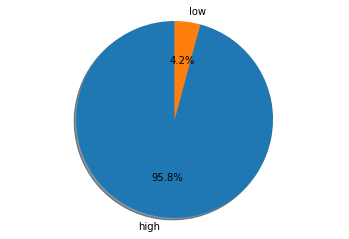

In [105]:
class_domain = []
for i in range(len(list_credibility)):
    class_domain.append(list_credibility[i][1])
class_domain = pd.Series(class_domain).value_counts().sort_values()
labels = ["high", "low"]
values = [class_domain.high, class_domain.low]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()